# Model Classification of Convective Mode

In [1]:
import numpy as np
import pandas as pd
import glob

from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

## Load CSV and Model

In [2]:
#load the csv
year = 2100
df = pd.read_csv(f'/shared/shared/jcorner_data/eoc8p5/eoc8p5_{year}_.csv')
df

,Unnamed: 0,Index,x,y,Filename,Time
0,0,0,482,109,10022099_T02_0id.npy,2099-10-02T02:00:00.000000000
1,1,1,483,109,10022099_T02_1id.npy,2099-10-02T02:00:00.000000000
2,2,2,481,110,10022099_T02_2id.npy,2099-10-02T02:00:00.000000000
3,3,3,482,110,10022099_T02_3id.npy,2099-10-02T02:00:00.000000000
4,4,4,483,110,10022099_T02_4id.npy,2099-10-02T02:00:00.000000000
...,...,...,...,...,...,...
14117,14117,14117,227,759,09242100_T04_14117id.npy,2100-09-24T04:00:00.000000000
14118,14118,14118,228,759,09242100_T04_14118id.npy,2100-09-24T04:00:00.000000000
14119,14119,14119,229,759,09242100_T04_14119id.npy,2100-09-24T04:00:00.000000000
14120,14120,14120,229,760,09242100_T04_14120id.npy,2100-09-24T04:00:00.000000000


In [3]:
#load the CNN model
model = keras.models.load_model("/home/jovyan/shared/jcorner_data/models/morph_model_v03.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 134, 134, 32)      320       
                                                                 
 spatial_dropout2d (SpatialD  (None, 134, 134, 32)     0         
 ropout2D)                                                       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 44, 44, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 64)        18496     
                                                                 
 spatial_dropout2d_1 (Spatia  (None, 42, 42, 64)       0         
 lDropout2D)                                                     
                                                        

2023-07-30 01:54:49.389873: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:952] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-30 01:54:49.397889: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:952] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-30 01:54:49.398053: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:952] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-30 01:54:49.398521: I tensorflow/core/platform/cpu_feature_guard.cc:152] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate 

## Classify Convective Mode

In [4]:
#create a list with the number corresponding to the convective mode.
lookup = {0:'isolated_cell', 1:'multiple_isolated_cells', 
          2:'loosely_clustered_cells', 3:'tightly_clustered_cells', 
          4:'qlcs', 5:'other'}

#create the new dataframe with the mode column
new_df = pd.DataFrame(columns=['x', 'y', 'Filename', 'Time', 'Mode'])

#iterate through all the numpy files in the directory
for rid, row in df.iterrows():
    
    #isolate the filename from the path and dataframe
    path = f'/shared/shared/jcorner_data/eoc8p5/{row.Filename}'

    #load the file
    file = np.load(path)

    if file.shape == (136, 136):
        
        #normalize the data
        file = file/80
    
        #expand the dimensions to the correct size
        file = np.expand_dims(file, 2)
        file = np.expand_dims(file, 0)
    
        #classify the convective mode using the CNN
        pred = model.predict(file)
        mode = [lookup[x] for x in np.argmax(pred, axis=1)]

        #append dataframe information to the dataframe
        new_df = new_df.append({'x': row.x, 'y':row.y, 'Filename': row.Filename, 'Time':row.Time, 'Mode': mode[0]}, ignore_index=True)

new_df

2023-07-30 01:54:51.036922: I tensorflow/stream_executor/cuda/cuda_dnn.cc:379] Loaded cuDNN version 8500
2023-07-30 01:54:51.521807: I tensorflow/stream_executor/cuda/cuda_blas.cc:1804] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


,x,y,Filename,Time,Mode
0,482,109,10022099_T02_0id.npy,2099-10-02T02:00:00.000000000,multiple_isolated_cells
1,483,109,10022099_T02_1id.npy,2099-10-02T02:00:00.000000000,loosely_clustered_cells
2,481,110,10022099_T02_2id.npy,2099-10-02T02:00:00.000000000,multiple_isolated_cells
3,482,110,10022099_T02_3id.npy,2099-10-02T02:00:00.000000000,multiple_isolated_cells
4,483,110,10022099_T02_4id.npy,2099-10-02T02:00:00.000000000,multiple_isolated_cells
...,...,...,...,...,...
13644,227,759,09242100_T04_14117id.npy,2100-09-24T04:00:00.000000000,tightly_clustered_cells
13645,228,759,09242100_T04_14118id.npy,2100-09-24T04:00:00.000000000,tightly_clustered_cells
13646,229,759,09242100_T04_14119id.npy,2100-09-24T04:00:00.000000000,tightly_clustered_cells
13647,229,760,09242100_T04_14120id.npy,2100-09-24T04:00:00.000000000,tightly_clustered_cells


In [5]:
#save the dataframe to a csv
new_df.to_csv(f'/shared/shared/jcorner_data/pkls/data/storm_modes_{year}_eoc8p5.csv')

## Check Model Predictions

<AxesSubplot:>

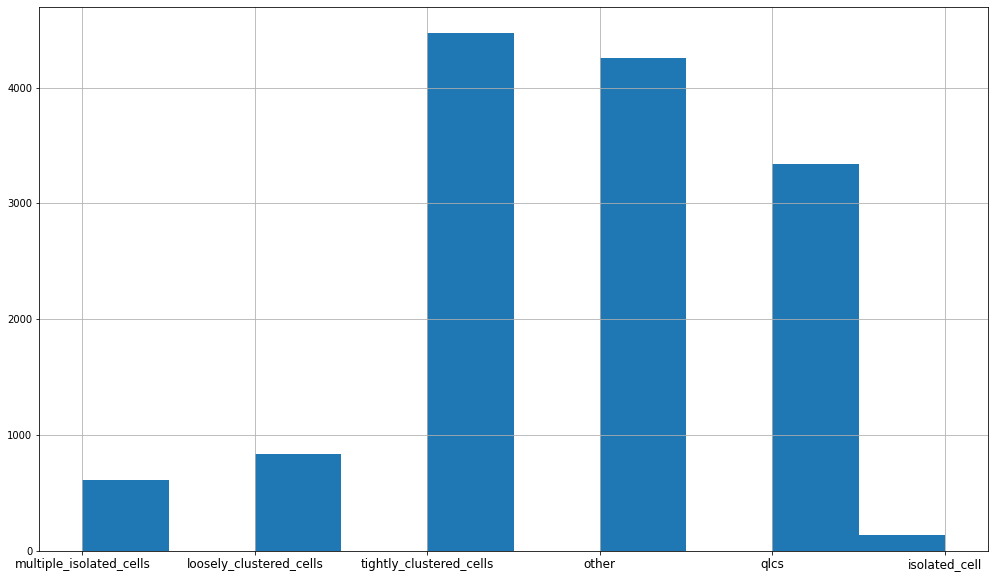

In [6]:
#create a histogram from the predictions
plt.rcParams['figure.figsize'] = 17, 10
new_df.Mode.hist(xlabelsize = 12)

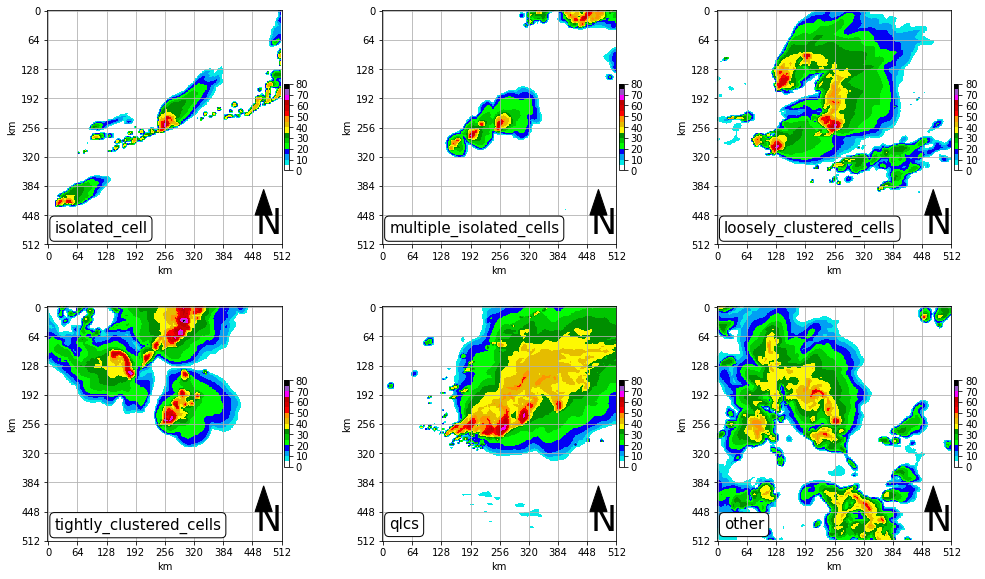

In [7]:
from svrimg.mapping.map_helper import radar_colormap, draw_box_plot
from matplotlib.colors import BoundaryNorm

#load a radarcolormap
cmap = radar_colormap()
classes = np.array(list(range(0, 85, 5)))
norm = BoundaryNorm(classes, ncolors=cmap.N)

#iterate through each class
for i in range(6):
    ax = plt.subplot(2,3,i+1)

    #find a random image for each class and annotate the class
    sample = np.load(f"/shared/shared/jcorner_data/eoc8p5/{new_df[(new_df['Mode'] == lookup[i])].sample()['Filename'].values[0]}")
    ax.annotate(f'{lookup[i]}', (0.03,0.05),fontsize=15, 
                        bbox=dict(boxstyle='round', facecolor='w', alpha=1), xycoords='axes fraction')

    #plot the data
    draw_box_plot(ax, sample.squeeze())